# Proyek Analisis Data: Nama dataset
- Nama: Muhammad Ilham
- Email: mhilham987@gmail.com
- Id Dicoding: mhilham987

## Menentukan Pertanyaan Bisnis

Perkenalkan saya adalah seorang data analyst dari sebuah perusahaan rental sepeda, perusahaan ini baru dibentuk 2 tahun lalu. Sebagai perusahaan baru yang mengusung konsep baru juga, inovasi perlu dilakukan untuk tetap memikat pelanggan dan shareholder. Oleh karena itu perusahaan ini perlu untuk mengevaluasi performa rental sepeda ini selama 2 tahun terakhir. Tidak hanya itu, perusahaan ini perlu memahami pelanggannya  sehingga dapat membuat sebuah strategi campaign yang lebih efisien. Perusahaan ini juga memiliki visi untuk terus berinovasi, tentu saja inovasi tidak boleh sembaranganm, sehingga perusahaan perlu mengetahui inovasi apa yang sesuai dan dapat memikat pelanggannya. untuk menjawab semua itu, saya mendefinisikan beberapa pertanyaan bisnis sebagai berikut:

- Bagaimana performa rental sepeda selama 2 tahun ini ?
- Pelanggan jenis apa yang paling banyak merental sepeda?
- Apakah musim mempengaruhi jumlah sepeda yang dirental ?
- Apakah cuaca mempengaruhi jumlah sepeda yang dirental ?
- Apakah hari mempengaruhi jumlah sepeda yang dirental ?



## Menyiapkan semua library yang dibutuhkan

Berikut adalah library yang saya gunakan untuk membantu saya dalam menganalisis kinerja perusahaan rental sepeda ini.

In [62]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
# Dalam membuat proyek ini, saya menggunakan google drive untuk menyimpan data set saya
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## Data Wrangling

Sebelum masuk ke dalam analisis, data mentah perlu diproses dahulu

### Gathering Data

Pertama saya  mengumpulkan semua yang data yang dibutuhkan

In [63]:
#raw_data=pd.read_csv('/data/data_1.csv')

In [64]:
raw_data = pd.read_csv('/content/gdrive/MyDrive/Dataset/day.csv')
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Setelah semua datanya terkumpul, data tersebut perlu dicek

In [65]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari output diatas, terlihat semua kolom sudah memiliki dimensi yang sama (tidak ada null atau missing values), namun kolom tanggal (dteday) masih dalam bentuk objek, sehingga perlu diubah

In [66]:
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


berdasarkan aturan kolom dari sumber dataset ini, semua kolom sudah memenuhi kriteria sesuai dengan sumber (tidak ada inaccurate values). kolom casual, registered, dan cnt memiliki nilai minimum yang sangan jauh dari mean dan standar deviasinya, saya curiga ini adalah pencilan

####Missing Values

In [67]:
raw_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data ini sudah tidak memiliki missing values, sehingga data ini sudah lengkap

####Duplicate

In [68]:
print("Jumlah duplikasi: ", raw_data.duplicated().sum())

Jumlah duplikasi:  0


Data ini sudah tidak memiliki duplikasi

####Outliers

In [69]:
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


saya curiga bahwa nilai minimum dari data set ini untuk kolom casual, registered, dan cnt menunjukan outlier

In [70]:
raw_data.loc[raw_data['cnt'] == 22]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2,20,22


jika dilihat dari output diatas, kejadian outlier ini terjadi saat season = 4 atau musim dingin dengan kondisi **cuaca** weathersit=3 atau hujan ringan/salju ring, hal ini menurut saya masuk akal karena disaat seperti itu sangat tidak nyaman untuk bersepeda bahkan bisa sangat berbahaya

In [71]:
raw_data.loc[667:700]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200,2,20,22
668,669,2012-10-30,4,1,10,0,2,1,2,0.318182,0.309909,0.825455,0.213009,87,1009,1096
669,670,2012-10-31,4,1,10,0,3,1,2,0.357500,0.361100,0.666667,0.166667,419,5147,5566
670,671,2012-11-01,4,1,11,0,4,1,2,0.365833,0.369942,0.581667,0.157346,466,5520,5986
671,672,2012-11-02,4,1,11,0,5,1,1,0.355000,0.356042,0.522083,0.266175,618,5229,5847
672,673,2012-11-03,4,1,11,0,6,0,2,0.343333,0.323846,0.491250,0.270529,1029,4109,5138
673,674,2012-11-04,4,1,11,0,0,0,1,0.325833,0.329538,0.532917,0.179108,1201,3906,5107
674,675,2012-11-05,4,1,11,0,1,1,1,0.319167,0.308075,0.494167,0.236325,378,4881,5259
675,676,2012-11-06,4,1,11,0,2,1,1,0.280833,0.281567,0.567083,0.173513,466,5220,5686
676,677,2012-11-07,4,1,11,0,3,1,2,0.295833,0.274621,0.547500,0.304108,326,4709,5035


In [72]:
raw_data.loc[(raw_data['season'] == 4) & (raw_data['weathersit'] == 3)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
284,285,2011-10-12,4,0,10,0,3,1,3,0.543333,0.517717,0.906250,0.248150,217,2199,2416
291,292,2011-10-19,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627
319,320,2011-11-16,4,0,11,0,3,1,3,0.456667,0.451988,0.930000,0.136829,145,1672,1817
324,325,2011-11-21,4,0,11,0,1,1,3,0.447500,0.445062,0.910000,0.138054,220,2545,2765
325,326,2011-11-22,4,0,11,0,2,1,3,0.416667,0.421696,0.962500,0.118792,69,1538,1607
339,340,2011-12-06,4,0,12,0,2,1,3,0.462500,0.456400,0.949583,0.232583,126,2468,2594
340,341,2011-12-07,4,0,12,0,3,1,3,0.410000,0.400246,0.970417,0.266175,50,655,705
640,641,2012-10-02,4,1,10,0,2,1,3,0.590833,0.542333,0.871667,0.104475,315,4324,4639
667,668,2012-10-29,4,1,10,0,1,1,3,0.440000,0.439400,0.880000,0.358200,2,20,22


namun melihat data lain dengan kondisi yang sama, hanya pada tanggal 29 oktober 2012 yang memberikan nilai yang sangat kecil, maka oulier ini akan saya uji lebih lanjut

### Cleaning Data

#### Outliers

Pertama, saya mencoba menghilangkan outlier tersebut

In [73]:
data_no_oulier = raw_data.copy()

In [74]:
data_no_oulier=data_no_oulier.drop(data_no_oulier[data_no_oulier['cnt'] == 22].index)


Lalu saya bandingkan dengan data mentah

In [75]:
data_no_oulier.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.586301,2.494521,0.500000,6.515068,0.028767,3.000000,0.683562,1.393151,0.495461,0.474402,0.627549,0.190256,849.335616,3661.153425,4510.489041
std,211.013951,1.110171,0.500343,3.451871,0.167266,2.004795,0.465405,0.542015,0.183165,0.163068,0.142220,0.077301,686.377168,1555.499166,1931.408300
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,9.000000,416.000000,431.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336875,0.337794,0.520000,0.134950,316.250000,2502.250000,3169.750000
50%,365.500000,2.500000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499167,0.487364,0.626250,0.180971,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,9.750000,0.000000,5.000000,1.000000,2.000000,0.655625,0.608916,0.729896,0.233207,1096.500000,4783.250000,5966.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [76]:
raw_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dapat dilihat dari kedua table diatas, nilai mean dan variansi dari kolom data numerik (temp, atemp, hum, casual, registered, dan cnt) tidak berubah secara signifikan oleh karena itu pencilan tersebut tidak akan mengubah distribusi dari data secara signifikan. Karena saya tidak tau bagaimana data ini diambil dan apa yang terjadi pada tanggal dimana pencilan itu terjadi, saya putuskan untuk tidak membuang pencilan ini

####Data type

saya ingin mengganti nilai pada kolom yang berisi indeks menjadi nilai sebenarnya, seperti pada kolom holiday yang berisi indeks 0 dan 1, menurut sumber indeks 0 berarti hari kerja dan indeks 1 berarti hari libur

In [77]:
data = raw_data.copy()

In [78]:
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [79]:
indeks_musim=['Spring', 'Summer', 'Fall', 'Winter']
indeks_libur=['Not Holiday', 'Holiday']
indeks_cuaca=['Clears', 'Mist or Cloudy', 'Light Rain or Light Snow', 'Heavy Rain or Heavy Snow']
indeks_hari=['Sunday', 'Monday', 'Tuesday', 'Wednesday', "Thursday", "Friday", "Saturday"]
indeks_tahun=['2011', '2012']
indeks_bulan=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
indeks_harikerja=['Not Working Day', 'Working Day']

data['season'] = data['season'].replace([1,2,3,4], indeks_musim)
data['holiday'] = data['holiday'].replace([0,1], indeks_libur)
data['weathersit'] = data['weathersit'].replace([1,2,3,4], indeks_cuaca)
data['weekday'] = data['weekday'].replace([0,1,2,3,4,5,6], indeks_hari)
data['mnth'] = data['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12], indeks_bulan)
data['yr'] = data['yr'].replace([0,1], indeks_tahun)
data['workingday'] = data['workingday'].replace([0,1], indeks_harikerja)

In [80]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,Not Holiday,Saturday,Not Working Day,Mist or Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,Not Holiday,Sunday,Not Working Day,Mist or Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,Not Holiday,Monday,Working Day,Clears,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,Not Holiday,Tuesday,Working Day,Clears,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,Not Holiday,Wednesday,Working Day,Clears,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Selanjutnya nya kolom dteday akan diubah kedalam format tanggal

In [81]:
data["dteday"] = pd.to_datetime(data["dteday"])
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,Not Holiday,Saturday,Not Working Day,Mist or Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,Not Holiday,Sunday,Not Working Day,Mist or Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,Not Holiday,Monday,Working Day,Clears,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,Not Holiday,Tuesday,Working Day,Clears,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,Not Holiday,Wednesday,Working Day,Clears,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Karena data sudah bersih, maka data siap untuk digunakan

## Exploratory Data Analysis (EDA)

### Statistika Deskriptif

In [82]:
data.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


####Performa rental sepeda dalam dua tahun terakhir

jumlah sepeda yang dirental perhari selama 2 tahun terakhir memiliki rata rata 4504.348837 atau sekitar 4504 sepeda per hari dengan peminjaman terendah yaitu 22 sepeda dan peminjaman tertinggi yaitu 8714 sepeda. dalam 2 tahun ini, peminjaman sepeda didominasi oleh pelanggan yang sudah terdaftar sebagai member.

####Performa rental sepeda per tahun

In [83]:
data.groupby(by="yr").agg({
    "casual": ["mean","sum","std"],
    "registered": ["mean","sum","std"],
    "cnt": ["mean","sum","std"]
})

casual                       registered                        \
             mean     sum         std         mean      sum          std   
yr                                                                         
2011   677.402740  247252  556.269121  2728.358904   995851  1060.110413   
2012  1018.483607  372765  758.989897  4581.450820  1676811  1424.331846   

              cnt                        
             mean      sum          std  
yr                                       
2011  3405.761644  1243103  1378.753666  
2012  5599.934426  2049576  1788.667868

berdasarkan tabel diatas, pada tahun 2012 terjadi peningkatan pada jumlah sepeda yang di rental dan pada rata rata sepeda yang direntalkan per hari. jumlah pelanggan member yang meminjam juga meningkat pada tahun 2012 dengan rata rata 4581.45 atau sekitar 4581 sepeda per hari, kemungkinan jumlah pelanggan member mengalami pertumbuhan

####Performa rental sepeda berdasarkan bulan

In [84]:
data.groupby(by="mnth").agg({
    "casual": ["mean","sum","std"],
    "registered": ["mean","sum","std"],
    "cnt": ["mean","sum","std"]
})

casual                      registered                       \
                  mean    sum         std         mean     sum          std   
mnth                                                                          
April      1013.366667  60802  738.345585  3471.533333  208292  1414.571151   
August     1161.919355  72039  466.576274  4502.500000  279155  1335.126601   
December    349.887097  21693  222.634531  3053.919355  189343  1465.052959   
February    262.508772  14963  232.283549  2392.789474  136389  1091.126003   
January     194.225806  12042  197.384490  1982.112903  122891  1053.274474   
July       1260.596774  78157  598.382778  4303.080645  266791  1190.542490   
June       1231.766667  73906  664.017647  4540.600000  272436  1012.958885   
March       716.838710  44444  624.308094  2975.419355  184476  1513.254354   
May        1214.274194  75285  754.950311  4135.500000  256401  1093.179612   
November    610.050000  36603  470.933096  3637.133333  218228  1219.589045   
October     963.870968  59760  703.205576  4235.354839  262592  1685.022519   
September  1172.050000  70323  738.378375  4594.466667  275668  1547.716749   

                   cnt                       
                  mean     sum          std  
mnth                                         
April      4484.900000  269094  1776.160778  
August     5664.419355  351194  1494.516146  
December   3403.806452  211036  1549.639353  
February   2655.298246  151352  1145.313307  
January    2176.338710  134933  1161.674370  
July       5563.677419  344948  1273.751871  
June       5772.366667  346342  1240.400031  
March      3692.258065  228920  1899.301812  
May        5349.774194  331686  1298.711561  
November   4247.183333  254831  1285.712709  
October    5199.225806  322352  1988.392517  
September  5766.516667  345991  1810.130649

####Performa rental sepeda berdasakan hari

In [85]:
data.groupby(by="weekday").agg({
    "casual": ["mean","sum","std"],
    "registered": ["mean","sum","std"],
    "cnt": ["mean","sum","std"]
})

casual                       registered                       \
                  mean     sum         std         mean     sum          std   
weekday                                                                        
Friday      752.288462   78238  483.422400  3938.000000  409552  1494.998698   
Monday      674.133333   70784  493.777298  3663.990476  384719  1504.215925   
Saturday   1465.257143  153852  927.082884  3085.285714  323955  1358.068784   
Sunday     1338.295238  140521  809.324777  2890.533333  303506  1179.713036   
Thursday    590.961538   61460  371.680307  4076.298077  423935  1642.753330   
Tuesday     556.182692   57843  342.748705  3954.480769  411266  1549.462149   
Wednesday   551.144231   57319  401.808954  3997.394231  415729  1723.710208   

                   cnt                       
                  mean     sum          std  
weekday                                      
Friday     4690.288462  487790  1874.624870  
Monday     4338.123810  455503  1793.074013  
Saturday   4550.542857  477807  2196.693009  
Sunday     4228.828571  444027  1872.496629  
Thursday   4667.259615  485395  1939.433317  
Tuesday    4510.663462  469109  1826.911642  
Wednesday  4548.538462  473048  2038.095884

dari tabel diatas, masing masing hari memiliki rata rata jumlah sepeda yang hampir sama yaitu kurang lebih 4500 sepeda per hari dengan sebaran yang hampir mirip juga. bagian ini akan diuji lebih lanjut

####Performa rental sepeda berdasarkan musim

In [86]:
data.groupby(by="season").agg({
    "casual": ["mean","sum","std"],
    "registered": ["mean","sum","std"],
    "cnt": ["mean","sum","std"]
})

casual                       registered                       \
               mean     sum         std         mean     sum          std   
season                                                                      
Fall    1202.611702  226091  595.975032  4441.691489  835038  1304.626949   
Spring   334.928177   60622  387.655561  2269.204420  410726  1200.269751   
Summer  1106.097826  203522  737.590829  3886.233696  715067  1353.375628   
Winter   729.112360  129782  606.318118  3999.050562  711831  1444.782557   

                cnt                        
               mean      sum          std  
season                                     
Fall    5644.303191  1061129  1459.800381  
Spring  2604.132597   471348  1399.942119  
Summer  4992.331522   918589  1695.977235  
Winter  4728.162921   841613  1699.615261

Dari tabel diatas, sepeda paling banyak dirental pada musim gugur (fall) dengan total 1061129 sepeda dan rata rata 5644.303191 atau sekitar 5644 sepeda per hari, dan sepeda paling sedikit dirental pada musim semi (spring) dengan total hanya 471338 sepeda dan rata rata 2604.13259 atau sekitar 2604 sepeda per hari.

In [87]:
data['season'].value_counts()

Fall      188
Summer    184
Spring    181
Winter    178
Name: season, dtype: int64

####Performa rental sepeda berdasakan hari libur

untuk menghindari ambiguitas, kolom working day yang akan digunakan

In [88]:
data.groupby(by="workingday").agg({
    "casual": ["mean","sum","std"],
    "registered": ["mean","sum","std"],
    "cnt": ["mean","sum","std"]
})

casual                       registered           \
                        mean     sum         std         mean      sum   
workingday                                                               
Not Working Day  1371.134199  316732  873.064794  2959.034632   683537   
Working Day       606.570000  303285  391.496032  3978.250000  1989125   

                                      cnt                        
                         std         mean      sum          std  
workingday                                                       
Not Working Day  1293.867686  4330.168831  1000269  2052.141245  
Working Day      1568.692453  4584.820000  2292410  1878.415583

Dari tabel diatas, sepeda paling banyak dirental pada hari kerja dengan jumlah 2292410 sepedah dan rata rata 4584.820000 atau sekitar 4585 sepeda per hari kerja. namun karena hari libur memiliki jumlah hari yang lebih sedikit dibandingkan hari kerja, maka bisa saja pernyataan saya bias.

Di hari libur, rata rata pelanggan casual lebih banyak dibandingkan saat hari kerja, hal ini cukup masuk akal karena pada hari libur orang orang memiliki lebih banyak waktu luang dan memiliki kesempatan lebih untuk keluar rumah, terbukti terdapat peningkatan pada rata rata pelanggan casual.

In [89]:
data['workingday'].value_counts()

Working Day        500
Not Working Day    231
Name: workingday, dtype: int64

####Performa rental sepeda berdasakan kondisi cuaca

In [90]:
data.groupby(by="weathersit").agg({
    "casual": ["mean","sum","std"],
    "registered": ["mean","sum","std"],
    "cnt": ["mean","sum","std"]
})

casual                       registered  \
                                mean     sum         std         mean   
weathersit                                                              
Clears                    964.030238  446346  700.476488  3912.755940   
Light Rain or Light Snow  185.476190    3895  260.975022  1617.809524   
Mist or Cloudy            687.352227  169776  619.082767  3348.510121   

                                                        cnt           \
                              sum          std         mean      sum   
weathersit                                                             
Clears                    1811606  1533.347265  4876.786177  2257952   
Light Rain or Light Snow    33974  1068.290954  1803.285714    37869   
Mist or Cloudy             827082  1463.566884  4035.862348   996858   

                                       
                                  std  
weathersit                             
Clears                    1879.483989  
Light Rain or Light Snow  1240.284449  
Mist or Cloudy            1809.109918

dari tabel diatas, sepeda paling banyak dirental saat cuaca cerah dengan total 	2257952 sepeda dan rata rata 4876.786177 atau sekitar 4877 sepeda perhari, dan paling sedikit yaitu pada saat hujan ringan dengan total hanya 37869 sepeda dan rata rata 1803.285714	atau sekitar 1803 sepeda perhari

In [91]:
data['weathersit'].value_counts()

Clears                      463
Mist or Cloudy              247
Light Rain or Light Snow     21
Name: weathersit, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa rental sepeda selama 2 tahun ini ?

####Performa rental secara overall

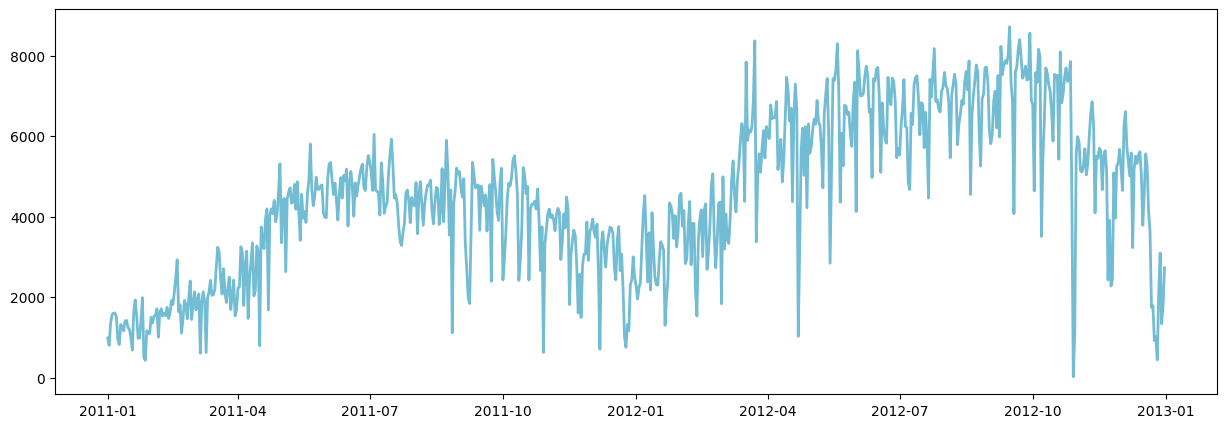

In [92]:
plt.figure(figsize=(15, 5))
plt.plot(data["dteday"], data["cnt"], linewidth=2, color="#72BCD4")

jika di plot perhari, akan sulit untuk dibaca

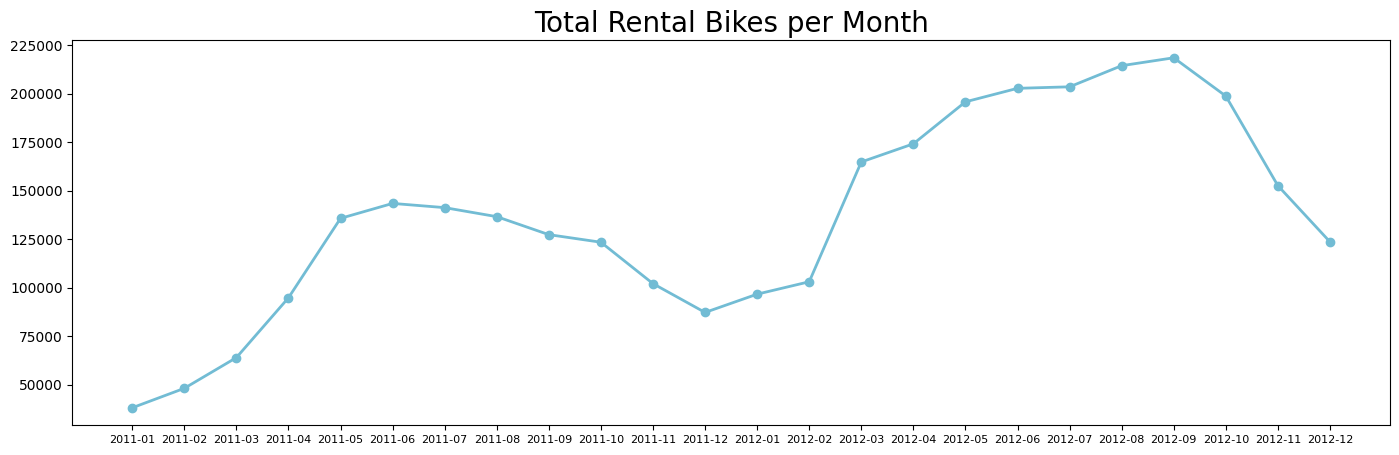

In [93]:
monthly_orders_df = data.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "cnt": "total"
}, inplace=True)

plt.figure(figsize=(17, 5))
plt.plot(monthly_orders_df["dteday"], monthly_orders_df["total"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Total Rental Bikes per Month", loc="center", fontsize=20)
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)

plt.show()

Dari plot diatas,terlihat tren naik dari total sepeda yang direntalkan yang menandakan terjadi peningkatan pelanggan di tahun 2012

Terdapat pola unik seperti gunung, dimulai dari maret jumlah sepeda yang dirental naik lalu mulai rata(perubahan tidak terlalu signifikan) pada bulan mei sampai bulan oktober/september jumlah sepeda yang dirental  akan turun drastis.

### Pertanyaan 2: Pelanggan jenis apa yang paling banyak merental sepeda?

karena hanya ada dua jenis pelanggan, akan digunakan piechart

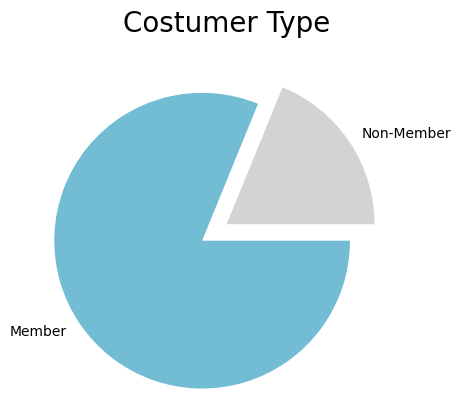

In [94]:

plt.pie([data["casual"].sum(),data["registered"].sum()], labels = ["Non-Member","Member"], explode=[0,0.2], colors = ["#D3D3D3","#72BCD4"])
plt.title("Costumer Type", loc="center", fontsize=20)
plt.show()

Berdasarkan pie chart diatas, rental sepeda ini lebih banyak digunakan oleh pelanggan yang sudah memiliki member,  dengan kata lain kebanyakan pelanggan dari rental sepeda ini sudah memiliki member

### Pertanyaan 3: Apakah musim mempengaruhi jumlah sepeda yang dirental ?

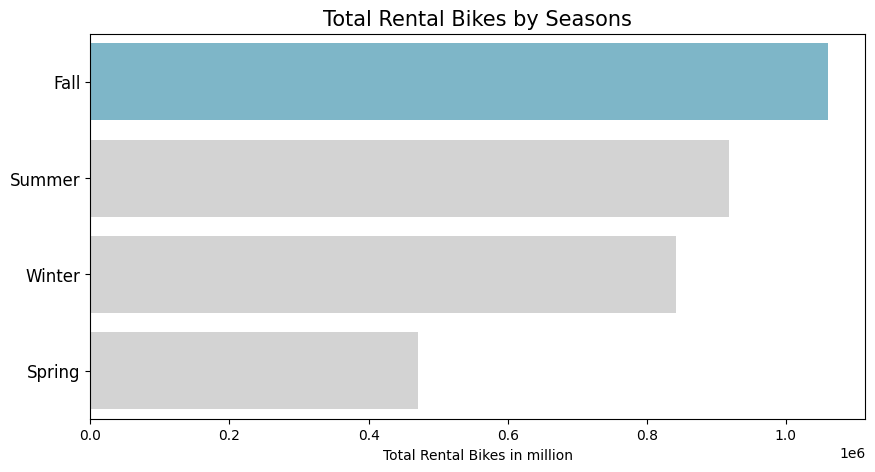

In [95]:
seasons=data.groupby(by="season").agg({
    "cnt": "sum"
}).reset_index()
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="cnt",
    y="season",
    data=seasons.sort_values(by="cnt", ascending=False),
    palette=colors_
)
plt.title("Total Rental Bikes by Seasons", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Total Rental Bikes in million")
plt.tick_params(axis='y', labelsize=12)
plt.show()

Dari plot diatas, sepeda paling banyak dirental pada musim gugur dan sepeda palinga sedikit dirental pada musim semi.

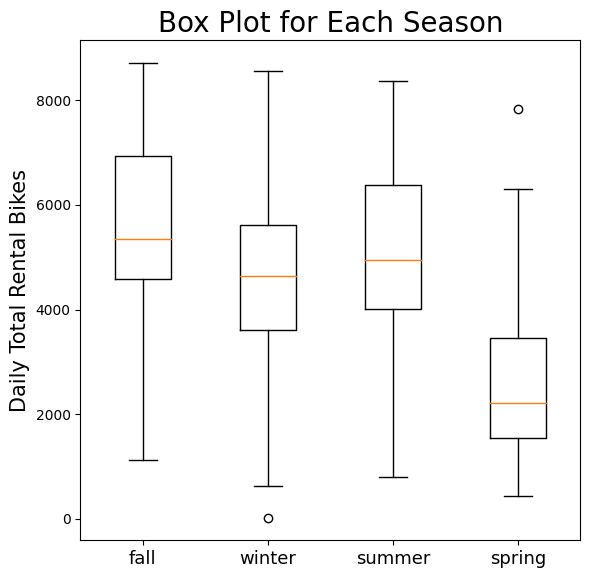

In [96]:
fall=data.loc[data['season'] == 'Fall', ['cnt']]
fall=fall['cnt'].to_numpy()
fall=fall.transpose()

winter=data.loc[data['season'] == 'Winter', ['cnt']]
winter=winter['cnt'].to_numpy()
winter=winter.transpose()

summer=data.loc[data['season'] == 'Summer', ['cnt']]
summer=summer['cnt'].to_numpy()
summer=summer.transpose()

spring=data.loc[data['season'] == 'Spring', ['cnt']]
spring=spring['cnt'].to_numpy()
spring=spring.transpose()

fig = plt.figure(figsize =(5,5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot([fall, winter, summer, spring])
plt.xticks([1,2,3,4],["fall", "winter", "summer", "spring"])
ax.set_title("Box Plot for Each Season", loc="center", fontsize=20)
ax.set_ylabel("Daily Total Rental Bikes", fontsize=15)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=10)
# show plot
plt.show()

Dari Boxplot ini, terlihat sebaran data saat musim fall, winter dan summer terlihat mirip, untuk menguji kemiripan tersebut akan digunakan ANOVA (untuk menguji kesamaan mean) atau Kruskall wallis (untuk menguji kesamaan median), sebelum masuk ke kedua uji tersebut, pertama data akan diuji kenormalannya dengan hipotesis nullnya yaitu data berdistribusi normal

In [97]:
musim=[fall,winter,summer,spring]
musim_string=["fall","winter",'summer','spring']
for i in range(len(musim)):
  print("untuk musim", musim_string[i], ":" , stats.shapiro(musim[i]))

untuk musim fall : ShapiroResult(statistic=0.9631575345993042, pvalue=7.679114060010761e-05)
untuk musim winter : ShapiroResult(statistic=0.9814850687980652, pvalue=0.01819615066051483)
untuk musim summer : ShapiroResult(statistic=0.9793388247489929, pvalue=0.007907751016318798)
untuk musim spring : ShapiroResult(statistic=0.938047468662262, pvalue=4.983094754607009e-07)


tolak hipotesis null ketika  α > p-value yang berarti data tidak berdistribusi normal. didapat untuk nilai taraf signifikansi (α) sebesar 1% sampai 10% hanya winter yang berdistribusi normal, sehingga uji anova tidak bisa dilakukan, oleh karena itu akan dilakukan uji kruskall wallis dengan hipotesis null yaitu median dari semua data sama

In [98]:
stats.kruskal(fall,winter,summer,spring)

KruskalResult(statistic=250.9335046488973, pvalue=4.110755793069794e-54)

untuk nilai taraf signifikansi (α) sebesar 1% sampai 10%, hipotesis null ditolak, yang berarti terdapat perbedaan median dari keempat musim. Dengan kata lain, musim berpengaruh terhadap jumlah sepeda yang dipinjam, hal ini mematahkan dugaan yang saya tarik saat melihat visualisasi

### Pertanyaan 4: Apakah cuaca mempengaruhi jumlah sepeda yang dirental ?



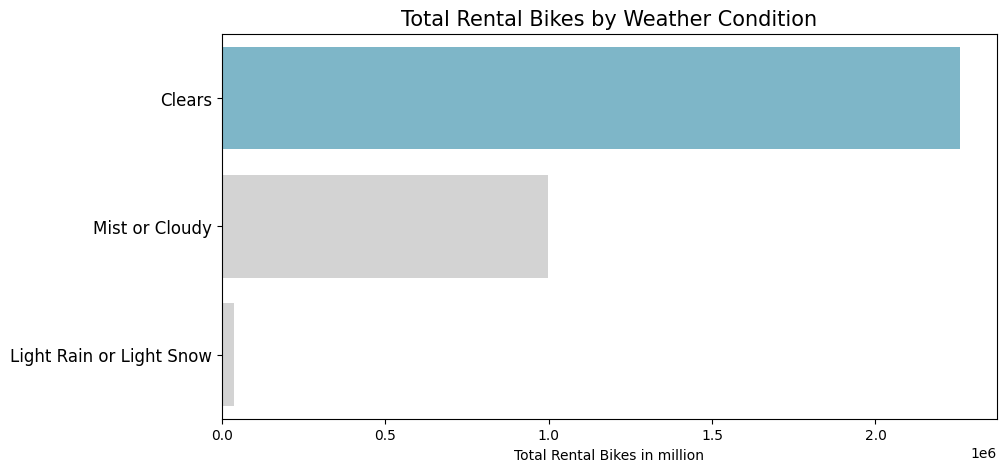

In [99]:
wea=data.groupby(by="weathersit").agg({
    "cnt": "sum"
}).reset_index()
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="cnt",
    y="weathersit",
    data=wea.sort_values(by="cnt", ascending=False),
    palette=colors_
)
plt.title("Total Rental Bikes by Weather Condition", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Total Rental Bikes in million")
plt.tick_params(axis='y', labelsize=12)
plt.show()

Dari plot diatas, sepeda paling banyak dirental pada saat cuaca cerah dan sepeda paling sedikit dirental pada saat hujan ringan/salju ringan.

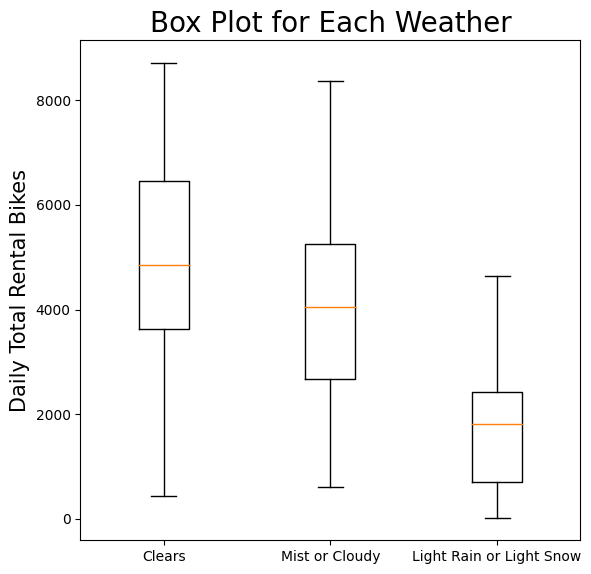

In [100]:
cerah=data.loc[data['weathersit'] == 'Clears', ['cnt']]
cerah=cerah['cnt'].to_numpy()
cerah=cerah.transpose()

berawan=data.loc[data['weathersit'] == 'Mist or Cloudy', ['cnt']]
berawan=berawan['cnt'].to_numpy()
berawan=berawan.transpose()

hujan=data.loc[data['weathersit'] == 'Light Rain or Light Snow', ['cnt']]
hujan=hujan['cnt'].to_numpy()
hujan=hujan.transpose()



fig = plt.figure(figsize =(5, 5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot([cerah, berawan, hujan])
plt.xticks([1,2,3],[ 'Clears', 'Mist or Cloudy', 'Light Rain or Light Snow'])
ax.set_title("Box Plot for Each Weather", loc="center", fontsize=20)
ax.set_ylabel("Daily Total Rental Bikes", fontsize=15)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
# show plot
plt.show()

Dari Boxplot ini, terlihat sebaran data saat langit cerah  dan mendung terlihat mirip, sama seperti pertanyaan sebelumnya, untuk menguji kemiripan tersebut akan digunakan ANOVA (untuk menguji kesamaan mean) atau Kruskall wallis (untuk menguji kesamaan median), sebelum masuk ke kedua uji tersebut, pertama data akan diuji kenormalannya dengan hipotesis nullnya yaitu data berdistribusi normal

In [101]:
cuaca=[cerah, berawan, hujan]
cuaca_string=['Clears', 'Mist or Cloudy', 'Light Rain or Light Snow']
for i in range(len(cuaca)):
  print("untuk kondisi cuaca", cuaca_string[i], ":" , stats.shapiro(cuaca[i]))

untuk kondisi cuaca Clears : ShapiroResult(statistic=0.9763644337654114, pvalue=7.903088317107176e-07)
untuk kondisi cuaca Mist or Cloudy : ShapiroResult(statistic=0.9800280928611755, pvalue=0.0014985068701207638)
untuk kondisi cuaca Light Rain or Light Snow : ShapiroResult(statistic=0.9213318824768066, pvalue=0.09226399660110474)


tolak hipotesis null ketika  α > p-value yang berarti data tidak berdistribusi normal. didapat untuk nilai taraf signifikansi (α) sebesar 1% sampai 9% hanya light rain yang berdistribusi normal, sehingga uji anova tidak bisa dilakukan, oleh karena itu akan dilakukan uji kruskall wallis dengan hipotesis null yaitu median dari semua data sama

In [102]:
stats.kruskal(cerah, berawan, hujan)

KruskalResult(statistic=67.17520449165305, pvalue=2.588747451005407e-15)

untuk nilai taraf signifikansi (α) sebesar 1% sampai 10%, hipotesis null ditolak, yang berarti terdapat perbedaan median dari ketiga kondisi cuaca. Dengan kata lain, kondisi cuaca berpengaruh terhadap jumlah sepeda yang dipinjam, hal ini mematahkan dugaan yang saya tarik saat melihat visualisasi

### Pertanyaan 5: Apakah hari mempengaruhi jumlah sepeda yang dirental ?



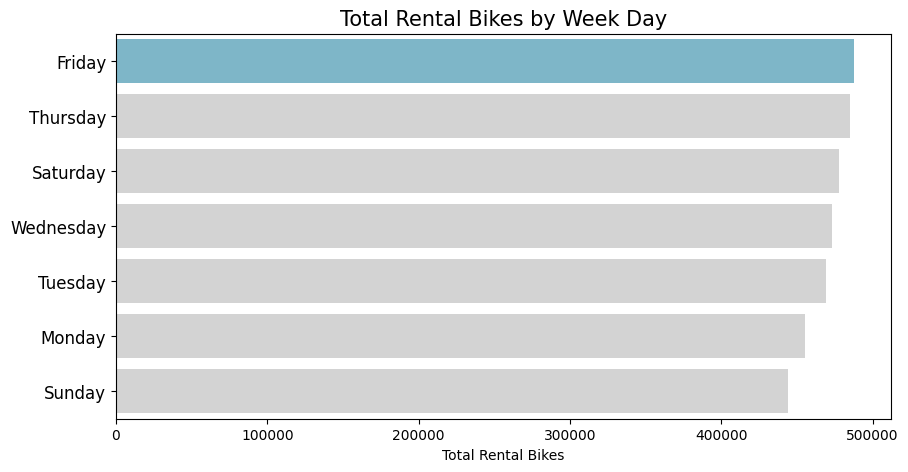

In [103]:
weekday=data.groupby(by="weekday").agg({
    "cnt": "sum"
}).reset_index()
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3" , "#D3D3D3"]
sns.barplot(
    x="cnt",
    y="weekday",
    data=weekday.sort_values(by="cnt", ascending=False),
    palette=colors_
)
plt.title("Total Rental Bikes by Week Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Total Rental Bikes")
plt.tick_params(axis='y', labelsize=12)
plt.show()

Dari plot diatas, sepeda paling banyak dirental pada hari jum'at dan sepeda paling sedikit dirental pada hari minggu.

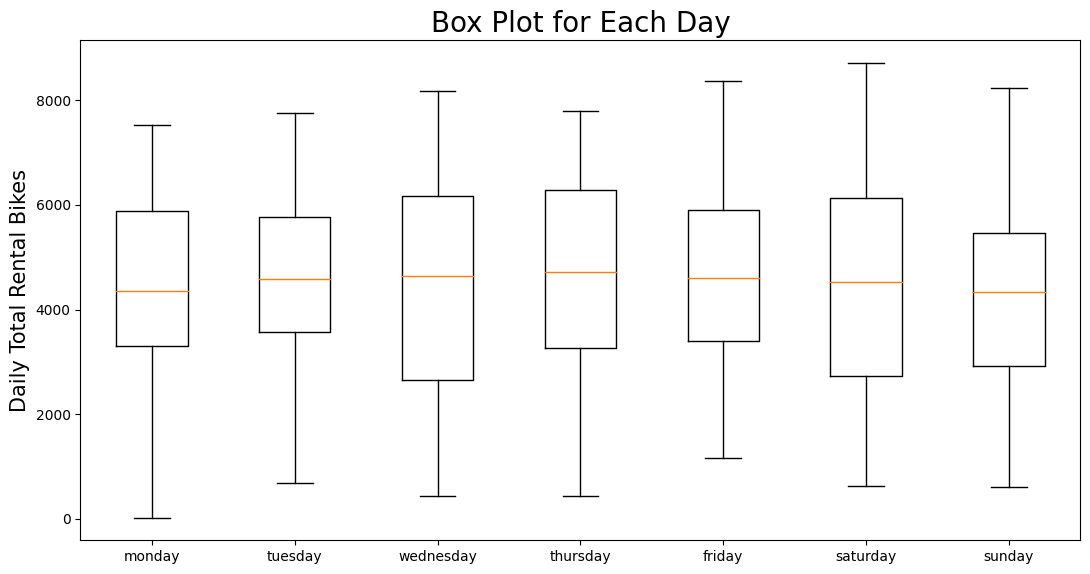

In [104]:
monday=data.loc[data['weekday'] == 'Monday', ['cnt']]
monday=monday['cnt'].to_numpy()
monday=monday.transpose()

tuesday=data.loc[data['weekday'] == 'Tuesday', ['cnt']]
tuesday=tuesday['cnt'].to_numpy()
tuesday=tuesday.transpose()



wednesday=data.loc[data['weekday'] == 'Wednesday', ['cnt']]
wednesday=wednesday['cnt'].to_numpy()
wednesday=wednesday.transpose()

thursday=data.loc[data['weekday'] == 'Thursday', ['cnt']]
thursday=thursday['cnt'].to_numpy()
thursday=thursday.transpose()

friday=data.loc[data['weekday'] == 'Friday', ['cnt']]
friday=friday['cnt'].to_numpy()
friday=friday.transpose()

saturday=data.loc[data['weekday'] == 'Saturday', ['cnt']]
saturday=saturday['cnt'].to_numpy()
saturday=saturday.transpose()

sunday=data.loc[data['weekday'] == 'Sunday', ['cnt']]
sunday=sunday['cnt'].to_numpy()
sunday=sunday.transpose()




fig = plt.figure(figsize =(10, 5))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot([monday, tuesday, wednesday, thursday, friday, saturday, sunday])
plt.xticks([1,2,3,4,5,6,7],['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
ax.set_title("Box Plot for Each Day", loc="center", fontsize=20)
ax.set_ylabel("Daily Total Rental Bikes", fontsize=15)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
# show plot
plt.show()

Dari Boxplot ini, terlihat sebaran data dari semua hari terlihat mirip, sama seperti pertanyaan sebelumnya, untuk menguji kemiripan tersebut akan digunakan ANOVA (untuk menguji kesamaan mean) atau Kruskall wallis (untuk menguji kesamaan median), sebelum masuk ke kedua uji tersebut, pertama data akan diuji kenormalannya dengan hipotesis nullnya yaitu data berdistribusi normal

In [105]:
hari=[monday, tuesday, wednesday, thursday, friday, saturday, sunday]
hari_string=['Senin','Selasa','Rabu','Kamis','Jumat','Sabtu','Minggu']
for i in range(len(hari)):
  print("untuk hari", hari_string[i], ":" , stats.shapiro(hari[i]))

untuk hari Senin : ShapiroResult(statistic=0.9723019599914551, pvalue=0.026764871552586555)
untuk hari Selasa : ShapiroResult(statistic=0.9646978378295898, pvalue=0.0071210358291864395)
untuk hari Rabu : ShapiroResult(statistic=0.9588786959648132, pvalue=0.002632882446050644)
untuk hari Kamis : ShapiroResult(statistic=0.9645448923110962, pvalue=0.006933141965419054)
untuk hari Jumat : ShapiroResult(statistic=0.9717303514480591, pvalue=0.025160953402519226)
untuk hari Sabtu : ShapiroResult(statistic=0.9675543308258057, pvalue=0.011229334399104118)
untuk hari Minggu : ShapiroResult(statistic=0.9811588525772095, pvalue=0.14150972664356232)


tolak hipotesis null ketika  α > p-value yang berarti data tidak berdistribusi normal. untuk nilai taraf signifikansi (α) sebesar 1% sampai 10% hari, didapat hari selasa dan hari kamis memiliki nilai yang sangat kecil (< 0.01) yang berarti hari kamis dan selasa berasal dari data yang tidak berdistribusi normal , sehingga uji anova tidak bisa dilakukan, oleh karena itu akan dilakukan uji kruskall wallis dengan hipotesis null yaitu median dari semua data sama

In [106]:
stats.kruskal(monday, tuesday, wednesday, thursday, friday, saturday, sunday)

KruskalResult(statistic=4.3374571794145975, pvalue=0.6311103402212379)

untuk nilai taraf signifikansi (α) sebesar 1% sampai 10%, hipotesis null tidak ditolak, yang berarti TIDAK terdapat perbedaan median dari ketujuh hari. Dengan kata lain, rata rata jumlah sepeda yang dipinjam bisa dikatakan mirip setiap harinya, hal ini sejalan dengan dugaan yang saya tarik saat melihat visualisasi

## Conclusion

- Conclution pertanyaan 1 : Selama 2 tahun terakhir, terdapat pertumbuhan jumlah pelanggan, yang berarti perusahaan ini sudah berada di jalur yang tepat.
- conclution pertanyaan 2  : jumlah member yang merental sepeda melebihi jumlah non-membernya, dengan kata lain dari semua pengguna rental sepeda ini, sebagian besarnya sudah mendaftar menjadi member, hal ini bagus karena member lebih cenderum untuk terus menggunakan rental sepeda ini.
- conclution pertanyaa 3 : faktor musim  mempengaruhi jumlah pelanggan yang merental sepeda.
- conlution pertanyaan 4 : faktor cuaca mempengaruhi jumlah pelanggan yang merental sepeda.
- conlution pertanyaan 5 : hari tidak mempengaruhi jumlah pelanggan yang merental sepeda.

Dari hasil analisis yang didapat, dalam dua tahun terakhir rental sepeda ini mengalami peningkatan popularitas, perusahaan juga berhasil memikat para pelanggan untuk mendafar menjadi member, dari dua hal ini tercipta ekosistem yang baik diantara perusahaan dengan pelanggannya, hal ini pun dibuktikan dengan rata rata pelanggan setiap harinya cenderung stabil meskipun pelanggan saja menurun akibat cuaca dan/atau musim.